# Titanic: Machine Learning from Disaster

Homepage: https://github.com/tien-le/kaggle-titanic

**unbelivable ... to achieve 1.000. How did they do this?**

**Just curious, how did they cheat the score?** ANS: maybe, we have the information existing in https://www.encyclopedia-titanica.org/titanic-victims/

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Practice Skills
* Binary classification
* Python and R basics

## References
https://www.kaggle.com/c/titanic

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic


## Data overview
The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

| **Variable**  | **Definition**  |**Key**  |
|----|----|----|
| eq | qe | qe | 
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex |  | 	
| Age | Age in years |  |	
| sibsp | # of siblings / spouses aboard the Titanic |  | 	
| parch | # of parents / children aboard the Titanic |  |	
| ticket | Ticket number |  | 	
| fare | Passenger fare |  | 	
| cabin | Cabin number |  | 	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
| Variable | Notes |  |

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Exploration

**Five Steps: Variable Identification, Uni-variate Analysis, Bi-variate Analysis, Missing Values Imputation, Outlier Treament**

### Step 1. Variable Identification
* Identify Preditor (input) variables + Target (output) variables
* Identify the data type and category of variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

In [2]:
trn_corpus = pd.read_csv("data/train.csv")

trn_corpus.info()
trn_corpus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tst_corpus = pd.read_csv("data/test.csv")
tst_corpus.info()
tst_corpus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#sns.pairplot(trn_corpus.dropna())

In [5]:
#sns.pairplot(tst_corpus.dropna())

### Answer for Step 1:

**1. Preditor (input) Variables and Data type**
* PassengerId    891 non-null int64
* Pclass         891 non-null int64
* Name           891 non-null object
* Sex            891 non-null object
* Age            **714** non-null float64
* SibSp          891 non-null int64
* Parch          891 non-null int64
* Ticket         891 non-null object
* Fare           891 non-null float64
* Cabin          **204** non-null object
* Embarked       **889** non-null object

**2. Target (output) Variables and Data Type**
* Survived       891 non-null int64

**3. Category of Variables**
* Continuous variables
    * PassengerId    891 non-null int64 #primary key
    * Age            **714** non-null float64
    * Fare           891 non-null float64
* Categorial variables
    * Name           891 non-null object
    * Sex            891 non-null object
    * Ticket         891 non-null object
    * Cabin          **204** non-null object
    * Embarked       **889** non-null object # embarked -- Port of Embarkation -- C = Cherbourg, Q = Queenstown, S = Southampton
    
    * SibSp          891 non-null int64 # # of siblings / spouses aboard the Titanic -- [1 0 3 4 2 5 8] ; 7 items
    * Parch          891 non-null int64 # # of parents / children aboard the Titanic -- [0 1 2 5 3 4 6] ; 7 items
    * Survived       891 non-null int64 #survival -- Survival -- 0 = No, 1 = Yes
    * Pclass         891 non-null int64 #pclass -- Ticket class -- 1 = 1st, 2 = 2nd, 3 = 3rd

**Verify the unique data in each variables**

In [6]:
#trn_corpus.head()

In [7]:
#print("PassengerId:", trn_corpus["PassengerId"].unique(), ";", trn_corpus["PassengerId"].nunique(), "items")
print("Survived:", trn_corpus["Survived"].unique(), ";", trn_corpus["Survived"].nunique(), "items")
print("Pclass:", trn_corpus["Pclass"].unique(), ";", trn_corpus["Pclass"].nunique(), "Pclass")
#print("Name:", trn_corpus["Name"].unique(), ";", trn_corpus["Name"].nunique(), "items")
print("Sex:", trn_corpus["Sex"].unique(), ";", trn_corpus["Sex"].nunique(), "items")
#print("Age:", trn_corpus["Age"].unique(), ";", trn_corpus["Age"].nunique(), "items")
print("SibSp:", trn_corpus["SibSp"].unique(), ";", trn_corpus["SibSp"].nunique(), "items")
print("Parch:", trn_corpus["Parch"].unique(), ";", trn_corpus["Parch"].nunique(), "items")
#print("Ticket:", trn_corpus["Ticket"].unique(), ";", trn_corpus["Ticket"].nunique(), "items") # 681 items
#print("Fare:", trn_corpus["Fare"].unique(), ";", trn_corpus["Fare"].nunique(), "items") # 248 items
#print("Cabin:", trn_corpus["Cabin"].unique(), ";", trn_corpus["Cabin"].nunique(), "items") # 147 items
print("Embarked:", trn_corpus["Embarked"].unique(), ";", trn_corpus["Embarked"].nunique(), "items")

Survived: [0 1] ; 2 items
Pclass: [3 1 2] ; 3 Pclass
Sex: ['male' 'female'] ; 2 items
SibSp: [1 0 3 4 2 5 8] ; 7 items
Parch: [0 1 2 5 3 4 6] ; 7 items
Embarked: ['S' 'C' 'Q' nan] ; 3 items


### Step 2. Uni-variate Analysis

In this step, we explore the variables one by one. It depends on the variable type: Continuous or Categorial.

**Continuous Variables**

--> Understanding the central tendency and spread of the variables.

+ Central Tendency: mean, mode, median, min, max
+ Measure of Dispersion: range, Quartile, IQR (Interquartile Range), Variance, Standard Deviation, Skewness, Kurtosis
+ Visualization Methods: Histogram, Box Plot

* Continuous variables
    * Age            **714** non-null float64
    * Fare           891 non-null float64


* Central Tendency: mean, mode, median, min, max

In [8]:
print("Central Tendency - for Age")
trn_corpus["Age"].describe()

Central Tendency - for Age


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
trn_corpus_Age_dropna = trn_corpus["Age"].dropna()

In [10]:
#Ref: https://docs.python.org/3/library/statistics.html
import statistics

corpus_stat = trn_corpus_Age_dropna.copy()
    
print("=" * 36)
print("=" * 36)
print("Averages and measures of central location - Age")
print("These functions calculate an average or typical value from a population or sample.")
print("-" * 36)

print("Mode (most common value) of discrete data = ", statistics.mode(trn_corpus["Age"]))

print("Arithmetic mean (“average”) of data = ", statistics.mean(corpus_stat))
#print("Harmonic mean of data = ", statistics.harmonic_mean(trn_corpus_Age_dropna))
#StatisticsError is raised if data is empty, or any element is less than zero. New in version 3.6.

print("Median (middle value) of data = ", statistics.median(corpus_stat))
print("Median, or 50th percentile, of grouped data = ", statistics.median_grouped(corpus_stat)) 
print("Low median of data = ", statistics.median_low(corpus_stat))
print("High median of data = ", statistics.median_high(corpus_stat))

print("=" * 36)
print("=" * 36)

print("Measures of spread - Age")
print("""These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.""")
print("-" * 36)
print("Population standard deviation of data = ", statistics.pstdev(corpus_stat))
print("Population variance of data = ", statistics.pvariance(corpus_stat))
print("Sample standard deviation of data = ", statistics.stdev(corpus_stat))
print("Sample variance of data = ", statistics.variance(corpus_stat))

Averages and measures of central location - Age
These functions calculate an average or typical value from a population or sample.
------------------------------------
Mode (most common value) of discrete data =  24.0
Arithmetic mean (“average”) of data =  29.6991176471
Median (middle value) of data =  28.0
Median, or 50th percentile, of grouped data =  28.3
Low median of data =  28.0
High median of data =  28.0
Measures of spread - Age
These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.
------------------------------------
Population standard deviation of data =  14.516321150817316
Population variance of data =  210.723579754
Sample standard deviation of data =  14.526497332334042
Sample variance of data =  211.019124746


In [11]:
print("Central Tendency - for Fare")
trn_corpus["Fare"].describe()

Central Tendency - for Fare


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
trn_corpus_Fare_dropna = trn_corpus["Fare"].dropna()

In [13]:
#Ref: https://docs.python.org/3/library/statistics.html
import statistics

corpus_stat = trn_corpus_Fare_dropna.copy()
    
print("=" * 36)
print("=" * 36)
print("Averages and measures of central location - Age")
print("These functions calculate an average or typical value from a population or sample.")
print("-" * 36)

print("Mode (most common value) of discrete data = ", statistics.mode(trn_corpus["Fare"]))

print("Arithmetic mean (“average”) of data = ", statistics.mean(corpus_stat))
#print("Harmonic mean of data = ", statistics.harmonic_mean(trn_corpus_Age_dropna))
#StatisticsError is raised if data is empty, or any element is less than zero. New in version 3.6.

print("Median (middle value) of data = ", statistics.median(corpus_stat))
print("Median, or 50th percentile, of grouped data = ", statistics.median_grouped(corpus_stat)) 
print("Low median of data = ", statistics.median_low(corpus_stat))
print("High median of data = ", statistics.median_high(corpus_stat))

print("=" * 36)
print("=" * 36)

print("Measures of spread - Age")
print("""These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.""")
print("-" * 36)
print("Population standard deviation of data = ", statistics.pstdev(corpus_stat))
print("Population variance of data = ", statistics.pvariance(corpus_stat))
print("Sample standard deviation of data = ", statistics.stdev(corpus_stat))
print("Sample variance of data = ", statistics.variance(corpus_stat))

Averages and measures of central location - Age
These functions calculate an average or typical value from a population or sample.
------------------------------------
Mode (most common value) of discrete data =  8.05
Arithmetic mean (“average”) of data =  32.2042079686
Median (middle value) of data =  14.4542
Median, or 50th percentile, of grouped data =  14.7399142857
Low median of data =  14.4542
High median of data =  14.4542
Measures of spread - Age
These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.
------------------------------------
Population standard deviation of data =  49.66553444477411
Population variance of data =  2466.66531169
Sample standard deviation of data =  49.6934285971809
Sample variance of data =  2469.43684574


* Measure of Dispersion: range, Quartile, IQR (Interquartile Range), Variance, Standard Deviation, Skewness, Kurtosis

* Visualization Methods: Histogram, Box Plot

In [14]:
trn_corpus_Age_dropna.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

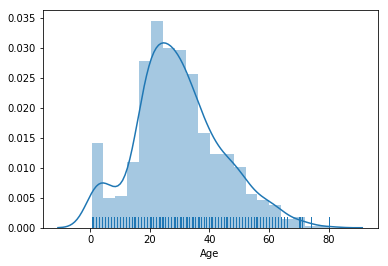

In [15]:
#sns.distplot(trn_corpus["Age"].dropna())
sns.distplot(trn_corpus_Age_dropna, rug=True, hist=True)

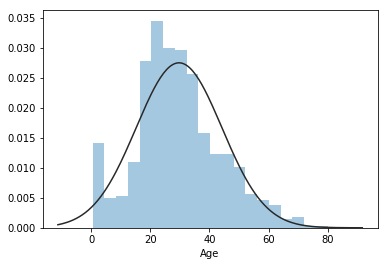

In [16]:
from scipy.stats import norm
ax = sns.distplot(trn_corpus_Age_dropna, fit=norm, kde=False)

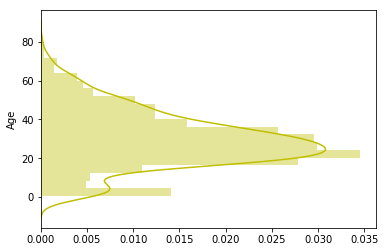

In [17]:
ax = sns.distplot(trn_corpus_Age_dropna, vertical=True, color="y")

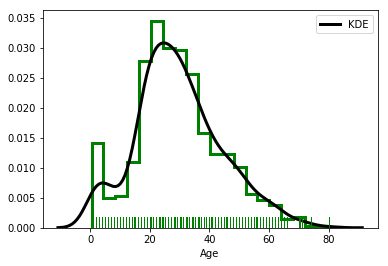

In [18]:
ax = sns.distplot(trn_corpus_Age_dropna, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": "g"})

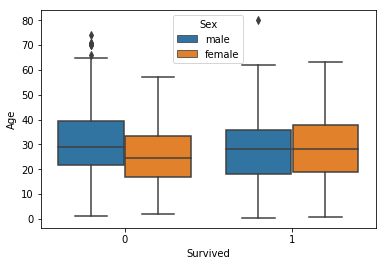

In [19]:
sns.boxplot(x="Survived", y="Age", hue="Sex", data=trn_corpus)

For boxplots, the assumption when using a hue variable is that it is nested within the x or y variable. This means that by default, the boxes for different levels of hue will be offset, as you can see above. If your hue variable is not nested, you can set the *dodge* parameter to disable offsetting:
Ref: http://seaborn.pydata.org/tutorial/categorical.html

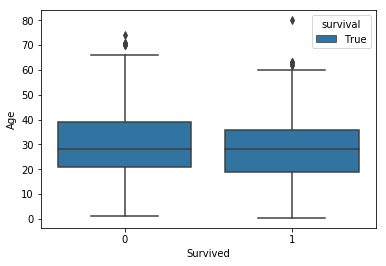

In [20]:
trn_corpus["survival"] = trn_corpus["Survived"].isin([0, 1])
sns.boxplot(x="Survived", y="Age", hue="survival", data=trn_corpus, dodge=False);

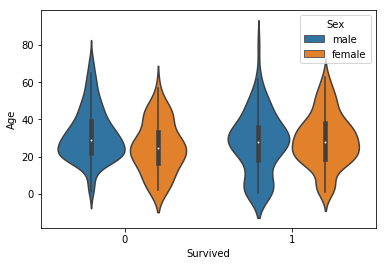

In [21]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus)

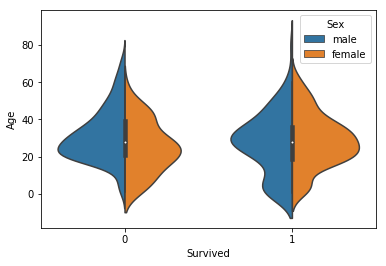

In [22]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus, split=True)

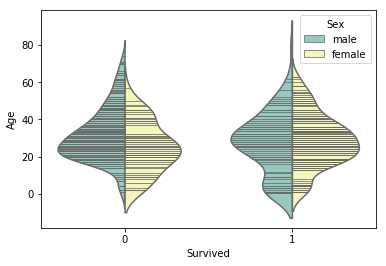

In [23]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus,
               split=True, inner="stick", palette="Set3");

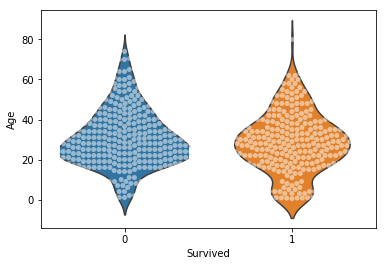

In [24]:
sns.violinplot(x="Survived", y="Age", data=trn_corpus, inner=None)
sns.swarmplot(x="Survived", y="Age", data=trn_corpus, color="w", alpha=.5);

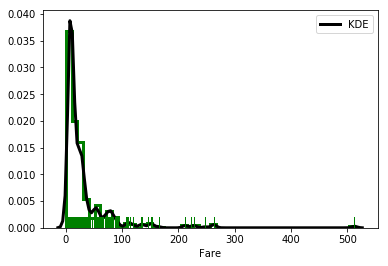

In [25]:
ax = sns.distplot(trn_corpus_Fare_dropna, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": "g"})

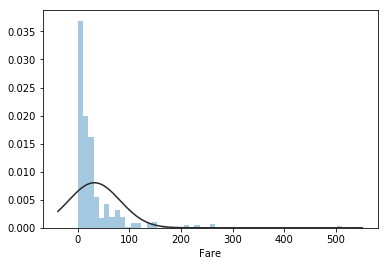

In [26]:
from scipy.stats import norm
ax = sns.distplot(trn_corpus_Fare_dropna, fit=norm, kde=False)

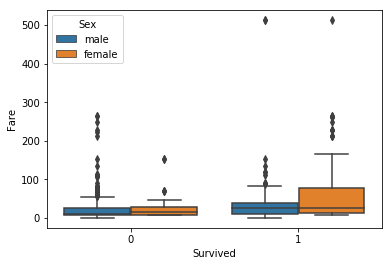

In [27]:
sns.boxplot(x="Survived", y="Fare", hue="Sex", data=trn_corpus)

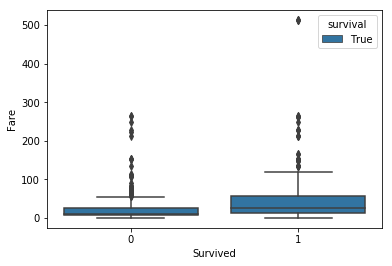

In [28]:
trn_corpus["survival"] = trn_corpus["Survived"].isin([0, 1])
sns.boxplot(x="Survived", y="Fare", hue="survival", data=trn_corpus, dodge=False);

**Categorial Variables**


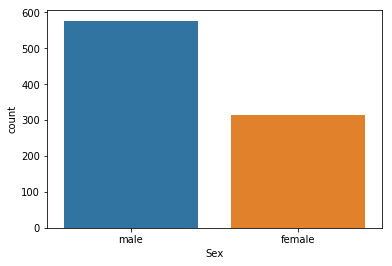

In [29]:
sns.countplot(x = "Sex", data = trn_corpus)

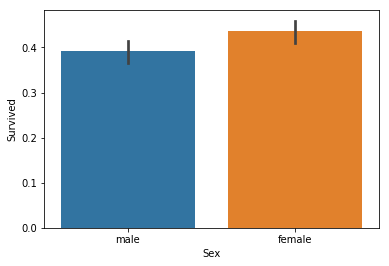

In [30]:
sns.barplot(x = "Sex", y = "Survived", data = trn_corpus, estimator=np.std)

### Step 3. Bi-variate Analysis 

**Continuous & Continuous**

**Categorial & Categorial**

**Categorial & Continuous**

### Step 4. Missing Value Treatment

### Step 5. Outlier Detection and Treatment

## Feature Engineering

**Variable Transformation & Variable/Feature Creation**

### Step 1. Variable Transformation

### Step 2. Variable/Feature Creation